<a href="https://colab.research.google.com/github/rajuiit/EsembleAutism-/blob/master/EsembleAutism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
# Importing Classifier Modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import numpy as np

In [0]:
train=pd.read_csv('gdrive/My Drive/Colab Notebooks/trainfinal.csv')

In [0]:
train.head(5)

,ID,Gender,Age,Autism,Family_Member,Can_Play_With,Jaundise,Region,House_Area,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,Q64,Q65,Result
0,1,Female,6.0,1,6,3,Yes,Urban,Medium,3,4,3,3,3,4,3,4,3,2,3.0,4,4,4.0,3.0,4,3.0,4.0,4,4,3,4,4,3,4,4,4,4,3,3,3,4,4.0,4,3.0,4,4,3.0,4,3.0,3,3,4,3,4,3,3,2,4.0,4,4.0,3,3,3,4,4.0,3,4,4,3,2,3,4,3,4,225
1,2,Female,6.0,1,6,3,Yes,Urban,Medium,3,3,4,4,2,4,2,4,3,2,3.0,4,2,4.0,3.0,4,3.0,4.0,3,4,3,4,3,3,4,4,3,4,4,3,3,4,4.0,3,3.0,3,3,4.0,4,4.0,4,3,4,4,3,3,3,3,3.0,3,4.0,4,4,3,4,3.0,4,3,4,4,4,3,4,3,4,223
2,3,Male,5.0,0,3,2,No,Urban,Small,1,1,1,1,1,1,1,1,1,1,1.0,1,1,2.0,1.0,1,1.0,1.0,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1.0,1,1.0,1,1,1.0,1,2.0,1,1,1,1,2,1,1,1,1.0,2,1.0,1,1,1,1,1.0,1,1,1,1,1,1,1,1,1,70
3,4,Male,7.0,1,3,2,Yes,Urban,Small,3,4,4,4,3,4,3,4,4,3,4.0,4,4,4.0,4.0,3,4.0,4.0,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4.0,4,4.0,4,4,4.0,4,4.0,4,4,4,4,4,4,4,4,3.0,3,3.0,3,3,3,3,4.0,4,3,3,4,4,4,4,4,3,244
4,5,Male,7.0,1,3,0,Yes,Urban,Small,4,4,4,3,4,4,3,4,4,3,4.0,4,4,4.0,4.0,4,3.0,3.0,4,4,4,4,4,4,4,4,3,4,3,4,4,4,4.0,4,4.0,4,4,3.0,4,3.0,4,4,4,4,4,4,4,4,3.0,4,4.0,4,3,4,4,2.0,4,4,3,4,4,3,4,3,4,244


In [0]:
def bar_chart(feature):
    autism = train[train['Autism']==1][feature].value_counts()
    noautism = train[train['Autism']==0][feature].value_counts()
    df = pd.DataFrame([autism,noautism])
    df.index = ['Autism','No Autism']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

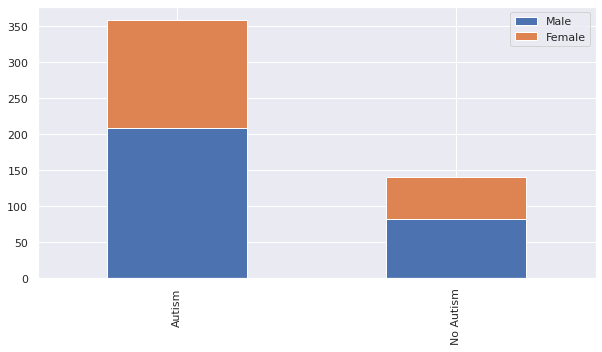

In [0]:
bar_chart('Gender')

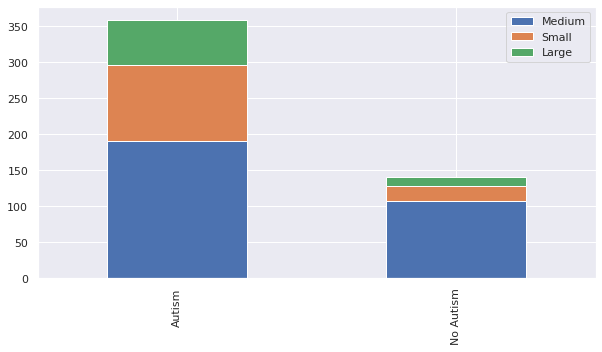

In [0]:
bar_chart('House_Area')

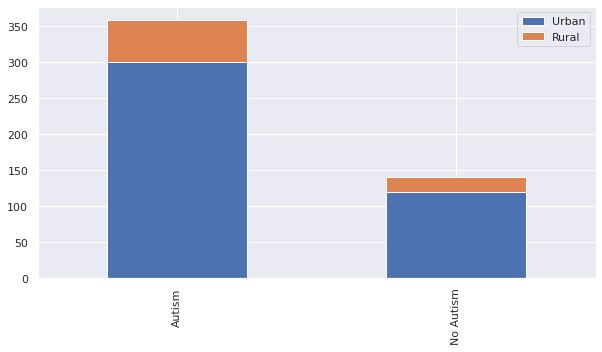

In [0]:
bar_chart('Region')

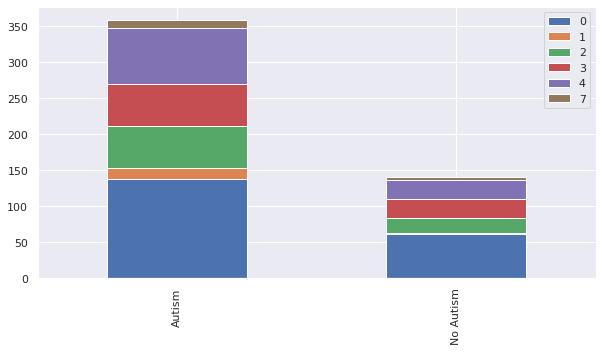

In [0]:
bar_chart('Can_Play_With')

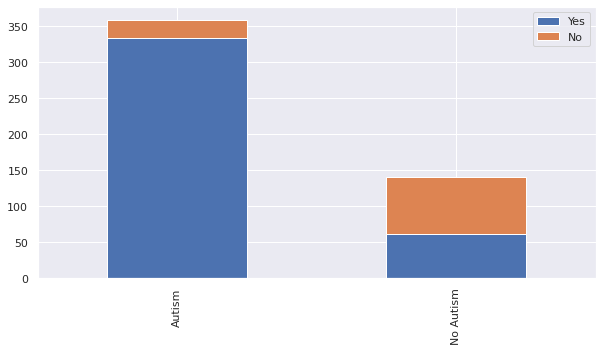

In [0]:
bar_chart('Jaundise')

In [0]:
train_test_data = [train]
sex_mapping = {"Male": 0, "Female": 1}
for dataset in train_test_data:
    dataset['Gender'] = dataset['Gender'].map(sex_mapping)

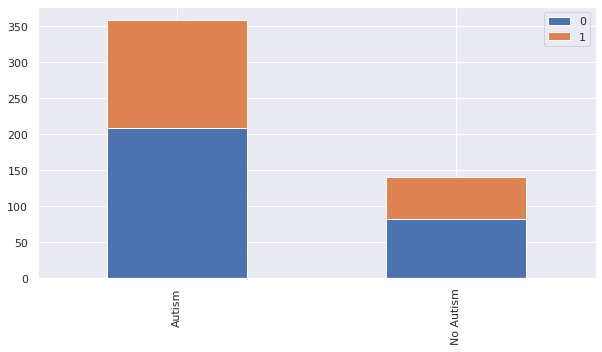

In [0]:
bar_chart('Gender')

In [0]:
train["Age"].fillna(train.groupby("Autism")["Age"].transform("median"), inplace=True)

In [0]:
train.groupby("Autism")["Age"].transform("median")

0      8.0
1      8.0
2      7.0
3      8.0
4      8.0
      ... 
495    7.0
496    8.0
497    8.0
498    8.0
499    7.0
Name: Age, Length: 500, dtype: float64

In [0]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 6, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 6) & (dataset['Age'] <= 12), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 12) & (dataset['Age'] <= 18), 'Age'] = 2

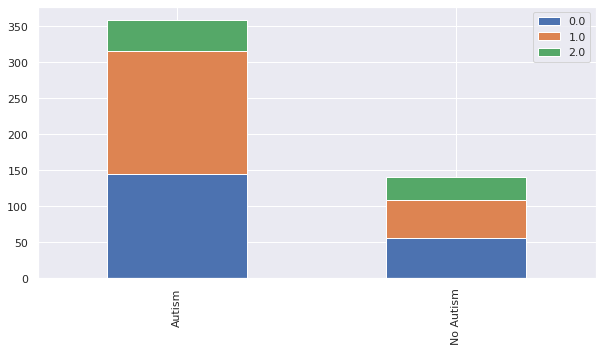

In [0]:
bar_chart('Age')

In [0]:
region_mapping = {"Urban": 0, "Rural": 1}
for dataset in train_test_data:
    dataset['Region'] = dataset['Region'].map(region_mapping)

In [0]:
house_mapping = {"Small": 0, "Medium": 1,"Large": 2}
for dataset in train_test_data:
    dataset['House_Area'] = dataset['House_Area'].map(house_mapping)

In [0]:
jaundise_mapping = {"Yes": 1, "No": 0}
for dataset in train_test_data:
    dataset['Jaundise'] = dataset['Jaundise'].map(jaundise_mapping)

In [0]:

for dataset in train_test_data:
    dataset['Q11'] = dataset['Q11'].fillna(3)

for dataset in train_test_data:
    dataset['Q14'] = dataset['Q14'].fillna(3)


for dataset in train_test_data:
    dataset['Q15'] = dataset['Q15'].fillna(3)

for dataset in train_test_data:
    dataset['Q17'] = dataset['Q17'].fillna(3)

for dataset in train_test_data:
    dataset['Q18'] = dataset['Q18'].fillna(3)

for dataset in train_test_data:
    dataset['Q33'] = dataset['Q33'].fillna(3)

for dataset in train_test_data:
    dataset['Q35'] = dataset['Q35'].fillna(3)

for dataset in train_test_data:
    dataset['Q38'] = dataset['Q38'].fillna(3)

for dataset in train_test_data:
    dataset['Q40'] = dataset['Q40'].fillna(3)

for dataset in train_test_data:
    dataset['Q49'] = dataset['Q49'].fillna(3)

for dataset in train_test_data:
    dataset['Q51'] = dataset['Q51'].fillna(3)

for dataset in train_test_data:
    dataset['Q65'] = dataset['Q65'].fillna(3)

for dataset in train_test_data:
    dataset['Q56'] = dataset['Q56'].fillna(3)

In [0]:
train_data = train.drop('Autism', axis=1)
target = train['Autism']
train_data.shape, target.shape

((500, 74), (500,))

In [0]:
train_data .head(500)

,ID,Gender,Age,Family_Member,Can_Play_With,Jaundise,Region,House_Area,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,Q64,Q65,Result
0,1,1,0.0,6,3,1,0,1,3,4,3,3,3,4,3,4,3,2,3.0,4,4,4.0,3.0,4,3.0,4.0,4,4,3,4,4,3,4,4,4,4,3,3,3,4,4.0,4,3.0,4,4,3.0,4,3.0,3,3,4,3,4,3,3,2,4.0,4,4.0,3,3,3,4,4.0,3,4,4,3,2,3,4,3,4,225
1,2,1,0.0,6,3,1,0,1,3,3,4,4,2,4,2,4,3,2,3.0,4,2,4.0,3.0,4,3.0,4.0,3,4,3,4,3,3,4,4,3,4,4,3,3,4,4.0,3,3.0,3,3,4.0,4,4.0,4,3,4,4,3,3,3,3,3.0,3,4.0,4,4,3,4,3.0,4,3,4,4,4,3,4,3,4,223
2,3,0,0.0,3,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1.0,1,1,2.0,1.0,1,1.0,1.0,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1.0,1,1.0,1,1,1.0,1,2.0,1,1,1,1,2,1,1,1,1.0,2,1.0,1,1,1,1,1.0,1,1,1,1,1,1,1,1,1,70
3,4,0,1.0,3,2,1,0,0,3,4,4,4,3,4,3,4,4,3,4.0,4,4,4.0,4.0,3,4.0,4.0,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4.0,4,4.0,4,4,4.0,4,4.0,4,4,4,4,4,4,4,4,3.0,3,3.0,3,3,3,3,4.0,4,3,3,4,4,4,4,4,3,244
4,5,0,1.0,3,0,1,0,0,4,4,4,3,4,4,3,4,4,3,4.0,4,4,4.0,4.0,4,3.0,3.0,4,4,4,4,4,4,4,4,3,4,3,4,4,4,4.0,4,4.0,4,4,3.0,4,3.0,4,4,4,4,4,4,4,4,3.0,4,4.0,4,3,4,4,2.0,4,4,3,4,4,3,4,3,4,244
5,6,0,1.0,3,0,1,0,0,4,3,4,4,3,4,3,4,4,3,4.0,4,4,3.0,3.0,4,4.0,4.0,4,4,3,4,4,4,4,4,3,4,4,4,3,4,4.0,4,4.0,4,4,3.0,4,4.0,4,4,3,4,4,4,4,4,4.0,4,3.0,4,3,4,4,4.0,2,4,4,4,3,3,4,4,3,242
6,7,1,0.0,3,4,1,0,0,4,3,4,3,4,3,2,4,3,3,4.0,4,3,4.0,4.0,3,4.0,4.0,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4.0,4,4.0,4,3,3.0,4,4.0,4,4,4,3,4,3,4,4,3.0,4,3.0,4,3,4,4,3.0,4,4,3,4,4,3,4,3,4,239
7,8,1,0.0,3,4,0,0,0,1,1,1,1,1,1,1,1,2,1,2.0,2,1,2.0,1.0,1,1.0,1.0,2,1,1,1,1,1,1,1,1,2,1,1,1,1,1.0,2,1.0,1,1,2.0,1,1.0,1,1,1,1,1,1,1,1,1.0,1,1.0,1,1,1,1,2.0,1,1,1,1,1,1,1,2,1,75
8,9,1,0.0,3,4,1,0,1,3,4,4,4,4,3,4,3,3,4,4.0,2,3,4.0,1.0,2,2.0,3.0,4,1,2,2,4,4,4,3,4,4,4,4,4,4,4.0,4,4.0,4,4,4.0,4,4.0,2,4,4,4,4,3,4,4,4.0,4,4.0,3,4,4,4,4.0,4,3,3,4,2,4,4,4,3,228
9,10,1,0.0,3,4,1,0,1,3,4,1,2,3,4,2,4,3,4,4.0,4,4,4.0,4.0,4,4.0,4.0,4,4,4,2,1,4,3,4,3,4,1,1,2,2,2.0,1,4.0,4,3,1.0,2,4.0,3,4,3,3,4,3,3,4,1.0,2,4.0,3,4,4,3,4.0,3,4,3,4,4,4,3,4,4,207


In [0]:
pd.set_option('display.max_rows',None)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=.20, random_state=0)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)
print(y_test)

X_train:  (400, 74)
X_test:  (100, 74)
y_train:  (400,)
y_test:  (100,)
90     0
254    0
283    1
445    0
461    1
15     1
316    0
489    1
159    1
153    1
241    1
250    1
390    1
289    0
171    1
329    0
468    1
355    1
154    1
37     1
205    1
366    0
240    0
108    1
45     1
438    1
21     1
367    0
96     1
233    1
428    1
118    1
124    1
191    1
374    1
492    0
311    1
451    1
353    1
238    1
322    0
46     1
403    0
221    1
76     1
1      1
213    0
325    1
418    1
102    0
363    0
170    1
343    0
144    1
132    1
12     1
327    1
173    0
224    1
342    0
78     0
276    0
387    1
425    1
301    1
196    1
10     1
469    0
271    1
75     1
142    0
65     1
340    1
484    0
175    1
362    1
264    1
100    1
491    1
295    0
300    1
235    0
475    1
219    0
330    1
326    0
421    1
157    0
348    1
54     1
220    1
402    0
379    1
200    0
179    0
372    1
56     1
440    1
60     1
208    1
Name: Autism, dtype: int64


In [0]:
#Decision Tree Classifier : Model Evaluation using Confusion Matrix
#model fil & train
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)

#Confusion Matrix & Measurement
print("DecisionTreeClassifier: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Acuracy: ", accuracy_score(y_test, y_pred)*100)
print("Classification Report: ")
print(classification_report(y_test, y_pred))

y_pred_prob = dt.predict_proba(X_test)[:,1]
print("AUC for DTC:", roc_auc_score(y_test, y_pred_prob)*100)


print("Average Precision Score:", average_precision_score(y_test, y_pred_prob)*100 )


DecisionTreeClassifier: 
Confustion Matrix: 
[[29  2]
 [ 2 67]]
Acuracy:  96.0
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        31
           1       0.97      0.97      0.97        69

    accuracy                           0.96       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.96      0.96      0.96       100

AUC for DTC: 95.32491818606826
Average Precision Score: 96.28691451375761


In [0]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
#Decision Tree Classifier : Model Evaluation using Cross Validation

print("Decision Tree Evaluation using Cross Validation:")
clf1 = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf1, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print("Score All:", score)
print("Accuracy:", round(np.mean(score)*100, 2))

# calculate cross-validated AUC for DTC
from sklearn.model_selection import cross_val_score
print("AUC: ", cross_val_score(clf1, train_data, target, cv=10, scoring='roc_auc').mean()*100)

#F-1 Score

clf1.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = clf1.predict(X_test)
print("F-1 Score:", fbeta_score(y_test, predictions_test, average='binary', beta=0.5)*100)


Decision Tree Evaluation using Cross Validation:
Score All: [0.94 0.96 1.   0.92 0.96 0.96 0.94 0.96 0.98 0.92]
Accuracy: 95.4
AUC:  95.22619047619048
F-1 Score: 97.10144927536233


In [0]:

#Multinomial Naive Bayes

clf2 = MultinomialNB()
clf2.fit(X_train, y_train)
y_m_pred = clf2.predict(X_test)

#Confusion Matrix & Measurement
print("Multinomial Naive Bayes: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_m_pred))
print("Acuracy: ", accuracy_score(y_test, y_m_pred)*100)
print("Classification Report: ",classification_report(y_test, y_m_pred))

y_pred_prob = dt.predict_proba(X_test)[:,1]
print("AUC for MultinomialNB:", roc_auc_score(y_test, y_pred_prob)*100)


print("Average Precision Score:", average_precision_score(y_test, y_pred_prob)*100 )


Multinomial Naive Bayes: 
Confustion Matrix: 
[[25  6]
 [15 54]]
Acuracy:  79.0
Classification Report:                precision    recall  f1-score   support

           0       0.62      0.81      0.70        31
           1       0.90      0.78      0.84        69

    accuracy                           0.79       100
   macro avg       0.76      0.79      0.77       100
weighted avg       0.81      0.79      0.80       100

AUC for MultinomialNB: 95.32491818606826
Average Precision Score: 96.28691451375761


In [0]:
#Multinomial Naive Bayes : Model Evaluation using Cross Validation

print("Multinomial Naive Bayes Evaluation using Cross Validation:")
clf2 = MultinomialNB()
scoring = 'accuracy'
score = cross_val_score(clf2, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print("Score All:", score)
print("Accuracy:", round(np.mean(score)*100, 2))

# calculate cross-validated AUC for DTC
from sklearn.model_selection import cross_val_score
print("AUC: ", cross_val_score(clf2, train_data, target, cv=10, scoring='roc_auc').mean()*100)

#F-1 Score

clf2.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = clf2.predict(X_test)
print("F-1 Score:", fbeta_score(y_test, predictions_test, average='binary', beta=0.5)*100)


Multinomial Naive Bayes Evaluation using Cross Validation:
Score All: [0.78 0.8  0.74 0.66 0.72 0.74 0.74 0.74 0.64 0.76]
Accuracy: 73.2
AUC:  88.47777777777776
F-1 Score: 87.37864077669903


In [0]:
#RandomForestClassifier

clf3 = RandomForestClassifier(n_estimators=13)
clf3.fit(X_train, y_train)
y_random_pred = clf3.predict(X_test)

#Confusion Matrix & Measurement
print("RandomForestClassifier: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_random_pred))
print("Acuracy: ", accuracy_score(y_test, y_random_pred)*100)
print("Classification Report: ",classification_report(y_test, y_random_pred))
y_pred_prob = dt.predict_proba(X_test)[:,1]
print("AUC for RandomForestClassifier:", roc_auc_score(y_test, y_pred_prob)*100)
print("Average Precision Score:", average_precision_score(y_test, y_pred_prob)*100 )

RandomForestClassifier: 
Confustion Matrix: 
[[29  2]
 [ 3 66]]
Acuracy:  95.0
Classification Report:                precision    recall  f1-score   support

           0       0.91      0.94      0.92        31
           1       0.97      0.96      0.96        69

    accuracy                           0.95       100
   macro avg       0.94      0.95      0.94       100
weighted avg       0.95      0.95      0.95       100

AUC for RandomForestClassifier: 95.32491818606826
Average Precision Score: 96.28691451375761


In [0]:
#RandomForestClassifier Evaluation using Cross Validation:

print("RandomForestClassifier Evaluation using Cross Validation:")
clf3 = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf3, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print("Score All:", score)
print("Accuracy:", round(np.mean(score)*100, 2))

# calculate cross-validated AUC for DTC
from sklearn.model_selection import cross_val_score
print("AUC: ", cross_val_score(clf3, train_data, target, cv=10, scoring='roc_auc').mean()*100)

#F-1 Score

clf3.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = clf3.predict(X_test)
print("F-1 Score:", fbeta_score(y_test, predictions_test, average='binary', beta=0.5)*100)


RandomForestClassifier Evaluation using Cross Validation:
Score All: [0.96 0.96 1.   0.92 0.94 0.98 0.98 0.98 0.98 0.96]
Accuracy: 96.6
AUC:  96.09166666666667
F-1 Score: 96.77419354838709


In [0]:
#SVM

clf4 = SVC(gamma='auto',probability=True)
clf4.fit(X_train, y_train)
y_svc_pred = clf4.predict(X_test)

#Confusion Matrix & Measurement
print("SVMClassifier: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_svc_pred))
print("Acuracy: ", accuracy_score(y_test, y_svc_pred)*100)
print("Classification Report: ",classification_report(y_test, y_svc_pred))

y_pred_prob = dt.predict_proba(X_test)[:,1]
print("AUC for SVMClassifier:", roc_auc_score(y_test, y_pred_prob)*100)


print("Average Precision Score:", average_precision_score(y_test, y_pred_prob)*100 )

SVMClassifier: 
Confustion Matrix: 
[[23  8]
 [ 2 67]]
Acuracy:  90.0
Classification Report:                precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.89      0.97      0.93        69

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100

AUC for SVMClassifier: 95.32491818606826
Average Precision Score: 96.28691451375761


In [0]:
print("SVMClassifier Evaluation using Cross Validation:")
clf4 = SVC(gamma='auto')
scoring = 'accuracy'
score = cross_val_score(clf4, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print("Score All:", score)
print("Accuracy:", round(np.mean(score)*100, 2))

# calculate cross-validated AUC for DTC
from sklearn.model_selection import cross_val_score
print("AUC: ", cross_val_score(clf4, train_data, target, cv=10, scoring='roc_auc').mean()*100)

#F-1 Score

clf4.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = clf4.predict(X_test)
print("F-1 Score:", fbeta_score(y_test, predictions_test, average='binary', beta=0.5)*100)

SVMClassifier Evaluation using Cross Validation:
Score All: [0.92 0.92 0.96 0.86 0.9  0.96 0.88 0.96 0.92 0.96]
Accuracy: 92.4
AUC:  93.19761904761904
F-1 Score: 90.78590785907859


In [0]:
#GaussianNB

clf5 = GaussianNB()
clf5.fit(X_train, y_train)
y_g_pred = clf5.predict(X_test)

#Confusion Matrix & Measurement
print("GaussianNBClassifier: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_g_pred))
print("Acuracy: ", accuracy_score(y_test, y_g_pred)*100)
print("Classification Report: ",classification_report(y_test, y_g_pred))

y_pred_prob = dt.predict_proba(X_test)[:,1]
print("AUC for GaussianNBClassifier:", roc_auc_score(y_test, y_pred_prob)*100)


print("Average Precision Score:", average_precision_score(y_test, y_pred_prob)*100 )

GaussianNBClassifier: 
Confustion Matrix: 
[[29  2]
 [ 2 67]]
Acuracy:  96.0
Classification Report:                precision    recall  f1-score   support

           0       0.94      0.94      0.94        31
           1       0.97      0.97      0.97        69

    accuracy                           0.96       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.96      0.96      0.96       100

AUC for GaussianNBClassifier: 95.32491818606826
Average Precision Score: 96.28691451375761


In [0]:
print("GaussianNBClassifier Evaluation using Cross Validation:")
clf5 = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf5, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print("Score All:", score)
print("Accuracy:", round(np.mean(score)*100, 2))

# calculate cross-validated AUC for DTC
from sklearn.model_selection import cross_val_score
print("AUC: ", cross_val_score(clf5, train_data, target, cv=10, scoring='roc_auc').mean()*100)

#F-1 Score

clf5.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = clf5.predict(X_test)
print("F-1 Score:", fbeta_score(y_test, predictions_test, average='binary', beta=0.5)*100)

GaussianNBClassifier Evaluation using Cross Validation:
Score All: [0.96 0.96 1.   0.94 0.98 1.   0.98 0.98 0.98 0.98]
Accuracy: 97.6
AUC:  96.30753968253968
F-1 Score: 97.10144927536233


In [0]:
#AdaBoostClassifier

clf6 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf6.fit(X_train, y_train)
y_ada_pred = clf6.predict(X_test)

#Confusion Matrix & Measurement
print("AdaBoostClassifier: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_ada_pred))
print("Acuracy: ", accuracy_score(y_test, y_ada_pred)*100)
print("Classification Report: ")

print(classification_report(y_test, y_ada_pred))

y_pred_prob = dt.predict_proba(X_test)[:,1]
print("AUC for AdaBoostClassifier:", roc_auc_score(y_test, y_pred_prob)*100)


print("Average Precision Score:", average_precision_score(y_test, y_pred_prob)*100 )

AdaBoostClassifier: 
Confustion Matrix: 
[[29  2]
 [ 2 67]]
Acuracy:  96.0
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        31
           1       0.97      0.97      0.97        69

    accuracy                           0.96       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.96      0.96      0.96       100

AUC for AdaBoostClassifier: 95.32491818606826
Average Precision Score: 96.28691451375761


In [0]:
print("AdaBoostClassifier Evaluation using Cross Validation:")
clf6 = AdaBoostClassifier(n_estimators=100, random_state=0)
scoring = 'accuracy'
score = cross_val_score(clf6, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print("Score All:", score)
print("Accuracy:", round(np.mean(score)*100, 2))

# calculate cross-validated AUC for DTC
from sklearn.model_selection import cross_val_score
print("AUC: ", cross_val_score(clf6, train_data, target, cv=10, scoring='roc_auc').mean()*100)

#F-1 Score

clf6.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = clf6.predict(X_test)
print("F-1 Score:", fbeta_score(y_test, predictions_test, average='binary', beta=0.5)*100)

AdaBoostClassifier Evaluation using Cross Validation:
Score All: [0.96 0.96 1.   0.94 0.98 1.   0.98 0.96 0.96 0.94]
Accuracy: 96.8
AUC:  95.80555555555556
F-1 Score: 97.10144927536233


In [0]:
#MLPClassifier

clf7 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf7.fit(X_train, y_train)
y_ml_pred = clf7.predict(X_test)

#Confusion Matrix & Measurement
print("MLPClassifier: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_ml_pred))
print("Acuracy: ", accuracy_score(y_test, y_ml_pred)*100)
print("Classification Report: ")

print(classification_report(y_test, y_ml_pred))

y_pred_prob = dt.predict_proba(X_test)[:,1]
print("AUC for MLPClassifier:", roc_auc_score(y_test, y_pred_prob)*100)


print("Average Precision Score:", average_precision_score(y_test, y_pred_prob)*100 )

MLPClassifier: 
Confustion Matrix: 
[[ 0 31]
 [ 0 69]]
Acuracy:  69.0
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.69      1.00      0.82        69

    accuracy                           0.69       100
   macro avg       0.34      0.50      0.41       100
weighted avg       0.48      0.69      0.56       100

AUC for MLPClassifier: 95.32491818606826
Average Precision Score: 96.28691451375761


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:

print("MLPClassifier Evaluation using Cross Validation:")
clf7 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
scoring = 'accuracy'
score = cross_val_score(clf7, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print("Score All:", score)
print("Accuracy:", round(np.mean(score)*100, 2))

# calculate cross-validated AUC for DTC
from sklearn.model_selection import cross_val_score
print("AUC: ", cross_val_score(clf7, train_data, target, cv=10, scoring='roc_auc').mean()*100)

#F-1 Score

clf7.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = clf7.predict(X_test)
print("F-1 Score:", fbeta_score(y_test, predictions_test, average='binary', beta=0.5)*100)

MLPClassifier Evaluation using Cross Validation:
Score All: [0.72 0.96 1.   0.68 0.78 0.7  0.68 0.66 0.74 0.98]
Accuracy: 79.0
AUC:  46.63690476190476
F-1 Score: 73.56076759061834


In [0]:
print("#####################")

#LogisticRegression

clf8=LogisticRegression()
clf8.fit(X_train,y_train)
y_predictionLogistic=clf8.predict(X_test)

#Confusion Matrix & Measurement
print("LogisticRegression: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_predictionLogistic))
print("Acuracy: ", accuracy_score(y_test, y_predictionLogistic)*100)
print("Classification Report: ")

print(classification_report(y_test, y_predictionLogistic))

y_pred_prob = dt.predict_proba(X_test)[:,1]
print("AUC for LogisticRegression:", roc_auc_score(y_test, y_pred_prob)*100)


print("Average Precision Score:", average_precision_score(y_test, y_pred_prob)*100 )

#####################
LogisticRegression: 
Confustion Matrix: 
[[29  2]
 [ 2 67]]
Acuracy:  96.0
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        31
           1       0.97      0.97      0.97        69

    accuracy                           0.96       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.96      0.96      0.96       100

AUC for LogisticRegression: 95.32491818606826
Average Precision Score: 96.28691451375761


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
from sklearn import model_selection
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=10, random_state=100)
print("LogisticRegression Evaluation using Cross Validation:")
clf8 = LogisticRegression(solver='lbfgs')
scoring = 'accuracy'
score = model_selection.cross_val_score(clf8, train_data, target, cv=kfold)
print("Score All:", score)
print("Accuracy:", round(np.mean(score)*100, 2))

# calculate cross-validated AUC for DTC
from sklearn.model_selection import cross_val_score
print("AUC: ", cross_val_score(clf8, train_data, target, cv=kfold, scoring='roc_auc').mean()*100)

#F-1 Score

clf8.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = clf8.predict(X_test)
print("F-1 Score:", fbeta_score(y_test, predictions_test, average='binary', beta=0.5)*100)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LogisticRegression Evaluation using Cross Validation:


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Score All: [0.98 0.94 0.96 0.98 0.98 0.94 0.96 0.88 0.96 0.96]
Accuracy: 95.4


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


AUC:  96.95300030834086
F-1 Score: 97.10144927536233


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [0]:

#KNNClassification

clf9 = KNeighborsClassifier(n_neighbors=4)
clf9.fit(X_train,y_train)
y_predictionKNN=clf9.predict(X_test)


#Confusion Matrix & Measurement
print("KNNClassification: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_predictionLogistic))
print("Acuracy: ", accuracy_score(y_test, y_predictionKNN)*100)
print("Classification Report: ")

print(classification_report(y_test, y_predictionKNN))

y_pred_prob = dt.predict_proba(X_test)[:,1]
print("AUC for KNNClassification:", roc_auc_score(y_test, y_pred_prob)*100)


print("Average Precision Score:", average_precision_score(y_test, y_pred_prob)*100 )

KNNClassification: 
Confustion Matrix: 
[[29  2]
 [ 2 67]]
Acuracy:  95.0
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        31
           1       0.97      0.96      0.96        69

    accuracy                           0.95       100
   macro avg       0.94      0.95      0.94       100
weighted avg       0.95      0.95      0.95       100

AUC for KNNClassification: 95.32491818606826
Average Precision Score: 96.28691451375761


In [0]:
print("KNNClassification Evaluation using Cross Validation:")
clf9 = KNeighborsClassifier(n_neighbors=20)
scoring = 'accuracy'
score = cross_val_score(clf9, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print("Score All:", score)
print("Accuracy:", round(np.mean(score)*100, 2))

# calculate cross-validated AUC for DTC
from sklearn.model_selection import cross_val_score
print("AUC: ", cross_val_score(clf9, train_data, target, cv=10, scoring='roc_auc').mean()*100)

#F-1 Score

clf9.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = clf9.predict(X_test)
print("F-1 Score:", fbeta_score(y_test, predictions_test, average='binary', beta=0.5)*100)

KNNClassification Evaluation using Cross Validation:
Score All: [0.96 0.96 1.   0.94 0.98 1.   0.98 0.98 0.98 0.98]
Accuracy: 97.6
AUC:  95.8015873015873
F-1 Score: 97.10144927536233


In [0]:
from sklearn.ensemble import GradientBoostingClassifier
# Step 6: Fit a Gradient Boosting model, " compared to "Decision Tree model, accuracy go up by 10%

#GradientBoostingClassifier

clf10 = GradientBoostingClassifier(n_estimators=100)
clf10.fit(X_train, y_train)
y_pred_gbt = clf10.predict(X_test)


#Confusion Matrix & Measurement
print("GradientBoostingClassifier: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_pred_gbt))
print("Acuracy: ", accuracy_score(y_test, y_pred_gbt)*100)
print("Classification Report: ")

print(classification_report(y_test, y_pred_gbt))

y_pred_prob = dt.predict_proba(X_test)[:,1]
print("AUC for GradientBoostingClassifier:", roc_auc_score(y_test, y_pred_prob)*100)


print("Average Precision Score:", average_precision_score(y_test, y_pred_prob)*100 )

GradientBoostingClassifier: 
Confustion Matrix: 
[[29  2]
 [ 2 67]]
Acuracy:  96.0
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        31
           1       0.97      0.97      0.97        69

    accuracy                           0.96       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.96      0.96      0.96       100

AUC for GradientBoostingClassifier: 95.32491818606826
Average Precision Score: 96.28691451375761


In [0]:
print("GradientBoostingClassifier Evaluation using Cross Validation:")
clf10 = GradientBoostingClassifier(n_estimators=100)
scoring = 'accuracy'
score = cross_val_score(clf10, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print("Score All:", score)
print("Accuracy:", round(np.mean(score)*100, 2))

# calculate cross-validated AUC for DTC
from sklearn.model_selection import cross_val_score
print("AUC: ", cross_val_score(clf10, train_data, target, cv=10, scoring='roc_auc').mean()*100)

#F-1 Score

clf10.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = clf.predict(X_test)
print("F-1 Score:", fbeta_score(y_test, predictions_test, average='binary', beta=0.5)*100)

GradientBoostingClassifier Evaluation using Cross Validation:
Score All: [0.96 0.96 1.   0.94 0.96 1.   0.98 0.98 0.98 0.92]
Accuracy: 96.8
AUC:  96.275
F-1 Score: 97.10144927536233


In [0]:
##Building the Function for AUC validation
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test,y_pred,average="macro"):
    lb=LabelBinarizer()
    lb.fit(y_test)
    y_test=lb.transform(y_test)
    y_pred=lb.transform(y_pred)
    return  metrics.roc_auc_score(y_test,y_pred,average=average)
##Building the Function for AUC validation ends here

In [0]:
## Voting Algo Start
from sklearn import metrics
print("#####################")
from sklearn.ensemble import VotingClassifier
Voting_Classification = VotingClassifier(estimators=[('descit',dt),('multinomial',nb), ('random', rf),('sv',sv),('gnb',gnb),('ada',ada),('mlp',ml),('knn', KNNClassification), ('Gradient', gbt)])
Voting_Classification.fit(X_train,y_train)
y_predictionVoting=Voting_Classification.predict(X_test)
print("Voting with SVM,Logistic,Knn,Descision Tree, Adaboost, MLP, Extra Tree:")
print("Accuracy: ",metrics.accuracy_score(y_test, y_predictionVoting)*100)

print(metrics.confusion_matrix(y_test,y_predictionVoting))

aucVoting=multiclass_roc_auc_score(y_test,y_predictionVoting,average="macro")
print("Are under Curve for Voting: ", aucVoting*100)

print("Report for Voting: ")
print(metrics.classification_report(y_test,y_predictionVoting))

print("#####################")

#####################
Voting with SVM,Logistic,Knn,Descision Tree, Adaboost, MLP, Extra Tree:
Accuracy:  96.0
[[29  2]
 [ 2 67]]
Are under Curve for Voting:  95.32491818606826
Report for Voting: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        31
           1       0.97      0.97      0.97        69

    accuracy                           0.96       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.96      0.96      0.96       100

#####################


In [0]:
from mlxtend.classifier import EnsembleVoteClassifier

eclf = EnsembleVoteClassifier(clfs=[clf1,clf2,clf3,clf4,clf5,clf6,clf7,clf9,clf10], weights=[1,1,1,1,1,1,1,1,1])

labels = ['Decission Tree Classification', 'MultinomialNB', 'Random Forest', 'Sipport Vector Machine','GaisianNB','ADaboost','MLP','KNN', 'Gradient','Ensemble']
for clf, label in zip([clf1,clf2,clf3,clf4,clf5,clf6,clf7,clf9,clf10, eclf], labels):
    scores = model_selection.cross_val_score(clf, train_data, target, cv=5,scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"%(scores.mean(), scores.std(), label))

Accuracy: 0.88 (+/- 0.12) [Decission Tree Classification]
Accuracy: 0.70 (+/- 0.24) [MultinomialNB]
Accuracy: 0.96 (+/- 0.00) [Random Forest]
Accuracy: 0.72 (+/- 0.00) [Sipport Vector Machine]
Accuracy: 0.98 (+/- 0.01) [GaisianNB]
Accuracy: 0.95 (+/- 0.02) [ADaboost]
Accuracy: 0.72 (+/- 0.17) [MLP]
Accuracy: 0.98 (+/- 0.01) [KNN]
Accuracy: 0.91 (+/- 0.11) [Gradient]
Accuracy: 0.98 (+/- 0.01) [Ensemble]
